In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
def get_indexnumbers(timeseries):
    return timeseries / timeseries[0] * 100

def get_share(timeseries, tottimeseries, tot_index):
    return tot_index * timeseries / tottimeseries

In [23]:
df_macro = pd.read_csv('../results/result_data/first.csv')
df_climate_energy = pd.read_csv('../results/result_data/climate_and_energy.csv')

In [24]:
warmup = 100

In [25]:
T_scen = np.array([100, 220, 340, 460])

# 1.5C scenario (C1)
scen_1_5 = np.array([55, 31, 17, 9])
scen_1_5_lower = np.array([53, 21, 6, 1])
scen_1_5_upper = np.array([58, 36, 23, 15])

# 2.0C scenario (C3)
scen_2_0 = np.array([55, 44, 29, 20])
scen_2_0_lower = np.array([53, 32, 20, 13])
scen_2_0_upper = np.array([58, 55, 36, 26])

# CurPol scenario (C7)
scen_C7 = np.array([55, 62, 67, 70])
scen_C7_lower = np.array([53, 53, 56, 58])
scen_C7_upper = np.array([58, 69, 76, 83])

[100.         112.72727273 121.81818182 127.27272727]


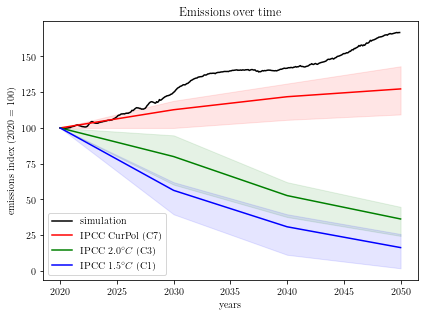

In [26]:
T = range(len(df_climate_energy.emissions_total))[warmup:]

fig = plt.figure(figsize=(6,4.5))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

em_tot = get_indexnumbers(df_climate_energy.emissions_total[warmup:].to_numpy())

# Simulation results
plt.plot(T, em_tot, label='simulation', color='black')

# CurPol scenario (C7)
plt.plot(T_scen, get_indexnumbers(scen_C7), color='red', label='IPCC CurPol (C7)')
plt.fill_between(T_scen, get_indexnumbers(scen_C7_upper), get_indexnumbers(scen_C7_lower), alpha=0.1, color='red')
print(get_indexnumbers(scen_C7))

# 2.0C scenario
plt.plot(T_scen, get_indexnumbers(scen_2_0), color='green', label='IPCC $2.0^\circ C$ (C3)')
plt.fill_between(T_scen, get_indexnumbers(scen_2_0_upper), get_indexnumbers(scen_2_0_lower), alpha=0.1, color='green')

# Most optimistic 1.5C scenario
plt.plot(T_scen, get_indexnumbers(scen_1_5), color='blue', label='IPCC $1.5^\circ C$ (C1)')
plt.fill_between(T_scen, get_indexnumbers(scen_1_5_upper), get_indexnumbers(scen_1_5_lower), alpha=0.1, color='blue')

# NL_targets = np.array([164, 99.45, 66.3, 44.2, 11.05])
# T_NL = np.array([100, 220, 280, 340, 460])

# em_NL = get_indexnumbers(NL_targets)

# plt.plot(T_NL, em_NL, color='#FF7700', label='Dutch target')

plt.title('Emissions over time')
plt.xlabel('years')
plt.ylabel('emissions index (2020 = 100)')
plt.xticks(np.arange(100, 500, 60), np.arange(2020, 2051, 5))
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('plots/emissions.pdf')
plt.show()